In [1]:
import gym.spaces
import numpy as np
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


from gym.envs.toy_text.frozen_lake import FrozenLakeEnv
env = FrozenLakeEnv(map_name="8x8",is_slippery=False)

gama = 0.5
epsilon = 0.1
alpha = 0.1

nrEpisodes = 10000

## ACTIONS
nrActions = 4
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

## STATES
nrStates = 8*8

## Random initialization
Q = np.zeros((nrStates,nrActions))

def printPolicy(pi):
    arrows = ["\t←\t", "\t↓\t", "\t→\t", "\t↑\t"]
    size = int(np.sqrt(len(pi)))
    for i in range(size):
        row = "|"
        for j in range(size):
            row += arrows[Pi[i*size+j]] + "|"
        print(row)

Q:
[[  1.93531275e-11   2.20143885e-11   8.34383105e-11   1.86679863e-11]
 [  1.30733754e-11   1.25608512e-10   4.84305287e-10   1.06192167e-10]
 [  6.90511904e-11   5.87344044e-10   1.97384662e-09   3.46423583e-10]
 [  4.35417978e-10   6.03686475e-09   1.15813780e-08   1.96753106e-09]
 [  2.87568330e-09   2.24157614e-08   6.49633555e-08   1.67419102e-08]
 [  1.37765110e-08   2.53978632e-07   1.90447973e-07   5.14703375e-08]
 [  8.47599906e-08   6.19726069e-07   4.36079980e-07   1.16980465e-07]
 [  1.58274757e-07   2.38540106e-06   3.06490869e-07   3.67938412e-07]
 [  3.12370858e-11   9.36261102e-12   5.74985744e-11   1.32777784e-11]
 [  1.80596696e-11   4.13591258e-11   7.09143978e-10   5.65230063e-11]
 [  1.24626951e-10   1.68269941e-10   3.79003988e-09   4.33779884e-10]
 [  4.23285846e-10   0.00000000e+00   2.82838203e-08   2.32456858e-09]
 [  6.28800798e-09   7.93495878e-08   1.51654454e-07   1.49915254e-08]
 [  3.48213860e-08   5.37036733e-07   6.42456901e-07   6.75941796e-08]
 [ 

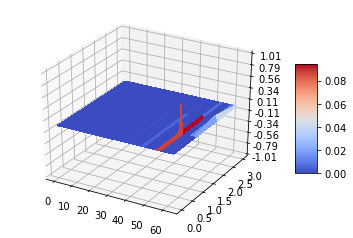

V:
[7.8681324733757873e-11, 4.5410424141364994e-10, 1.8508785984892848e-09, 1.0923769988868659e-08, 6.1141937752150092e-08, 2.4132260559440195e-07, 5.8919212506853961e-07, 2.2273135834434261e-06, 5.4533118159713553e-11, 6.5885672487389759e-10, 3.523953812930805e-09, 2.623123015445423e-08, 1.4279609752051997e-07, 6.1025894125685325e-07, 2.7846314849668676e-06, 9.5428115325266252e-06, 4.9254055145406144e-11, 1.4559593001668719e-10, 4.5748283098398526e-10, 0.0, 5.538965944882078e-07, 3.3349741776944955e-06, 1.1222457542395402e-05, 4.9218281522347821e-05, 8.8294485854945198e-11, 7.3060698147495341e-10, 2.24864752044968e-09, 1.8451790703009442e-08, 1.1261880929256875e-07, 0.0, 8.1062752934640529e-05, 0.00040805133644675098, 2.931442962289418e-11, 1.9193145346581377e-10, 3.834281562559339e-10, 0.0, 5.0306428090590419e-07, 2.2447023094381995e-05, 0.00054043522759587815, 0.0037106605423425001, 5.805101617659029e-12, 0.0, 0.0, 2.2502689364625147e-09, 6.479343878127155e-08, 2.7398522011399044e-0

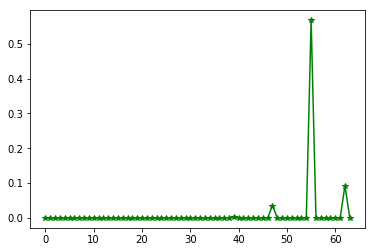

Policy:
[2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 1, 2, 3, 3, 0, 2, 2, 2, 1, 3, 0, 0, 2, 2, 3, 0, 1, 3, 0, 1, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 2, 0]
|	→	|	→	|	→	|	→	|	→	|	↓	|	↓	|	↓	|
|	→	|	→	|	→	|	→	|	→	|	→	|	↓	|	↓	|
|	→	|	→	|	↓	|	←	|	→	|	→	|	→	|	↓	|
|	→	|	→	|	→	|	→	|	↓	|	←	|	↓	|	↓	|
|	→	|	↑	|	↑	|	←	|	→	|	→	|	→	|	↓	|
|	↑	|	←	|	←	|	→	|	→	|	↑	|	←	|	↓	|
|	↑	|	←	|	↓	|	←	|	←	|	↑	|	←	|	↓	|
|	↑	|	←	|	←	|	←	|	←	|	←	|	→	|	←	|
Episode avg. length:  32.2133


In [2]:
def egreedyAction(s):
    return np.argmax(Q[s,:]) if np.random.rand(0,1)>epsilon else env.action_space.sample()
 
def V(s):
    return (1-epsilon) * np.max(Q[s,:]) + epsilon * np.mean(Q[s,:])

episodeAccumLen = 0
for e in range(nrEpisodes):
    env.reset()
    #env.render()
    s = 0
    a = egreedyAction(s)
    terminated = False
    while not terminated:
        nextS, R, terminated, debug_info = env.step(a)
        #env.render()
        nextA = egreedyAction(nextS)
        Q[s,a] = Q[s,a] + alpha * (R + gama * Q[nextS, nextA] - Q[s,a])
        s = nextS
        #print(s)
        a = nextA
        episodeAccumLen += 1
    #env.render()
    #print("End of episode")

V = [V(s) for s in range(nrStates)]
Pi = [np.argmax(Q[s,:]) for s in range(nrStates)]

print("Q:")
print(Q)

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.

X = [i for i in range(nrStates)]
Y = [i for i in range(nrActions)]
X, Y = np.meshgrid(X, Y)
Z = Q[X,Y]

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

print("V:")
print(V)

figure()
plot([i for i in range(nrStates)], V, 'g*-')
show()

print("Policy:")
print(Pi)
printPolicy(Pi)
            
print("Episode avg. length: ", episodeAccumLen/nrEpisodes)

